In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [5]:
k_out = [5e-5, 5e-4, 5e-3]
models = ['PPF1','PPF2','FLD1','FLD1S']
w0 = {'PPF1':-0.7,'PPF2':-1.15,'FLD1':-0.7,'FLD1S':-0.7}
wa = {'PPF1':0.,'PPF2':0.5,'FLD1':0.,'FLD1S':0.}
omega_cdm = {'PPF1':0.104976,'PPF2':0.120376,'FLD1':0.104976,'FLD1S':0.104976}
omega_b = 0.022
##Omega_cdm = {'PPF1':0.26,'PPF2':0.21,'FLD1':0.26,'FLD1S':0.26}
##Omega_b = 0.05
h = {'PPF1':0.64,'PPF2':0.74,'FLD1':0.64,'FLD1S':0.64}
cosmo = {}

for M in models:
    use_ppf = 'yes'
    gauge = 'Newtonian'
    if 'FLD' in M:
        use_ppf = 'no'
    if 'S' in M:
        gauge = 'Synchronous'
        
    cosmo[M] = Class()
    
    cosmo[M].set({'output':'tCl Mpk dTk vTk','k_output_values':str(k_out).strip('[]'),
                  'h':h[M],
                  'omega_b':omega_b,'omega_cdm':omega_cdm[M],
                  ##'Omega_b':Omega_b,'omega_cdm':Omega_cdm[M],
                  'cs2_fld':1.,
          'w0_fld':w0[M],'wa_fld':wa[M],'Omega_Lambda':0.,'gauge':gauge,
                 'use_ppf':use_ppf})
    cosmo[M].compute()

(6e-11, 1e-09)

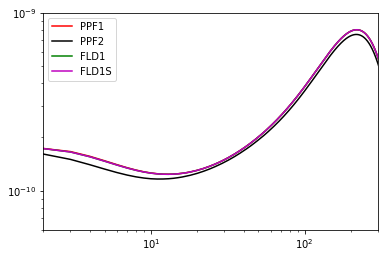

In [6]:
colours = ['r','k','g','m']
for i,M in enumerate(models):
    cl = cosmo[M].raw_cl()
    l = cl['ell']
    
    plt.loglog(l,cl['tt']*l*(l+1)/(2.*np.pi),label=M,color=colours[i])
plt.legend(loc='upper left')

plt.xlim([2,300])
#plt.xlim([20,300])

plt.ylim([6e-11,1e-9])

(0.3, 0.63)

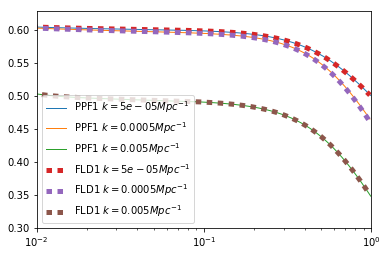

In [7]:
for M in ['PPF1','FLD1']:
    csm = cosmo[M]
    pt = csm.get_perturbations()
    pts = pt['scalar']
    for i,k in enumerate(k_out):
        ptk = pts[i]
        a = ptk['a']
        phi = ptk['phi']
        psi = ptk['psi']
        if 'FLD' in M:
            ls = ':'
            lw=5
        else:
            ls = '-'
            lw=1
        plt.semilogx(a,0.5*(phi+psi),label=M+' '+'$k='+str(k)+'Mpc^{-1}$',ls=ls,lw=lw)
plt.legend(loc='lower left')
plt.xlim([1e-2,1])
plt.ylim([0.3,0.63])

515 514
512 512
541 540
562 569
537 544
550 551


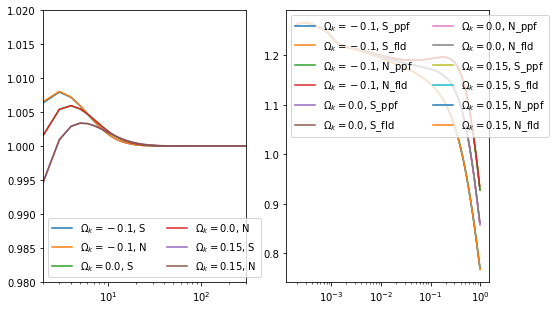

In [12]:
#kminclosed = sqrt(-8*Omega_k)*(70/3e5) Mpc^(-1)

k_out = [1e-3] #[1e-4, 1e-3, 1e-2]
#models = ['PPF1','PPF2','FLD1']
models = ['PPF1','FLD1']
w0 = {'PPF1':-0.7,'PPF2':-1.15,'FLD1':-0.7,'FLD1S':-0.7}
wa = {'PPF1':0.,'PPF2':0.5,'FLD1':0.,'FLD1S':0.}
omega_cdm = {'PPF1':0.104976,'PPF2':0.120376,'FLD1':0.104976,'FLD1S':0.104976}
omega_b = 0.022
##Omega_cdm = {'PPF1':0.26,'PPF2':0.21,'FLD1':0.26,'FLD1S':0.26}
##Omega_b = 0.05
h = {'PPF1':0.64,'PPF2':0.74,'FLD1':0.64}

fig, axes = plt.subplots(1,2,figsize=(8,5))
for Omega_K in [-0.1, 0.0, 0.15]:
    for gauge in ['Synchronous','Newtonian']:
        cosmo = {}
        for M in models:
            use_ppf = 'yes'
            if 'FLD' in M:
                use_ppf = 'no'
        
            cosmo[M] = Class()
    
            cosmo[M].set({'output':'tCl Mpk dTk vTk','k_output_values':str(k_out).strip('[]'),
                  'h':h[M],
                  'omega_b':omega_b,'omega_cdm':omega_cdm[M],'Omega_k':Omega_K,
                  ##'Omega_b':Omega_b,'omega_cdm':Omega_cdm[M],
                  'cs2_fld':1.,
          'w0_fld':w0[M],'wa_fld':wa[M],'Omega_Lambda':0.,'gauge':gauge,
                 'use_ppf':use_ppf,'hyper_sampling_curved_low_nu':10.0})
            cosmo[M].compute()
            
        label = r'$\Omega_k='+str(Omega_K)+'$, '+gauge[0]
        clfld = cosmo['FLD1'].raw_cl()
        clppf = cosmo['PPF1'].raw_cl()
        
        axes[0].semilogx(clfld['ell'][2:],clppf['tt'][2:]/clfld['tt'][2:],label=label)
        
        ptfld = cosmo['FLD1'].get_perturbations()['scalar']
        ptppf = cosmo['PPF1'].get_perturbations()['scalar']
        for i,k in enumerate(k_out):
            ptkfld = ptfld[i]
            a = ptkfld['a']
            phi_plus_phi_fld = ptkfld['phi']+ptkfld['psi']
            ptkppf = ptppf[i]
            phi_plus_phi_ppf = ptkppf['phi']+ptkppf['psi']
            axes[1].semilogx(ptkppf['a'],phi_plus_phi_ppf,label=label+'_ppf')
            axes[1].semilogx(ptkfld['a'],phi_plus_phi_fld,label=label+'_fld')
            print len(ptkppf['a']),len(ptkfld['a'])
      
        axes[0].legend(loc='lower left',ncol=2)
        axes[0].set_xlim([2,300])
        axes[0].set_ylim([0.98,1.02])

        axes[1].legend(loc='upper left',ncol=2)
        axes[1].set_xlim([1e-2,1])
        axes[1].autoscale()
#        axes[1].set_ylim([0.0,0.2])
        
            

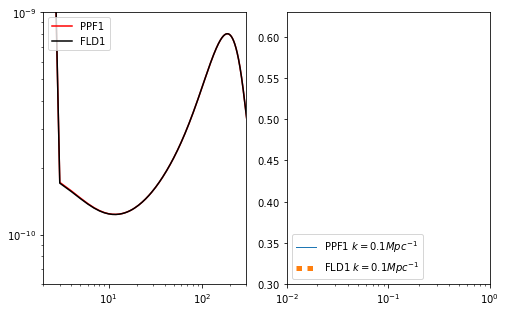

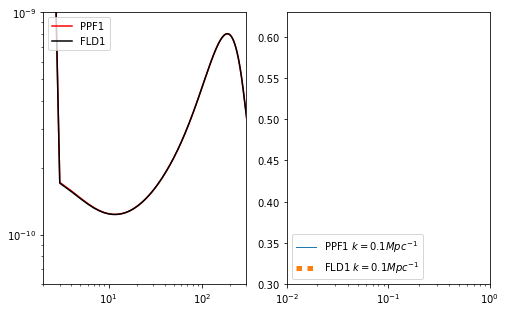

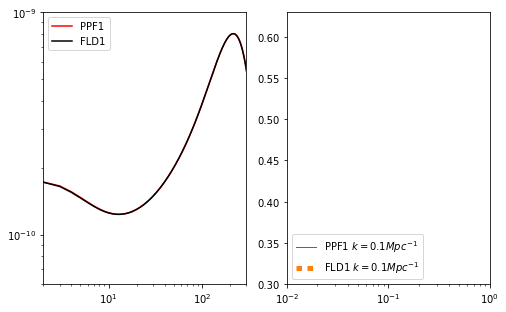

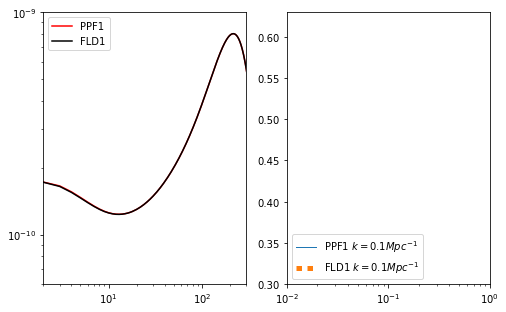

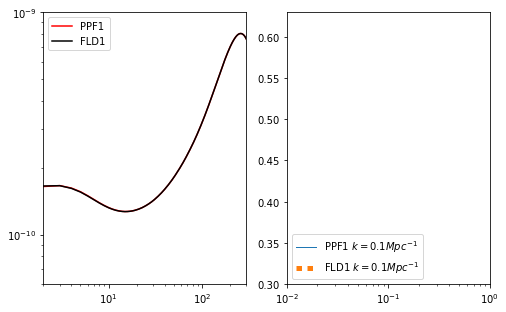

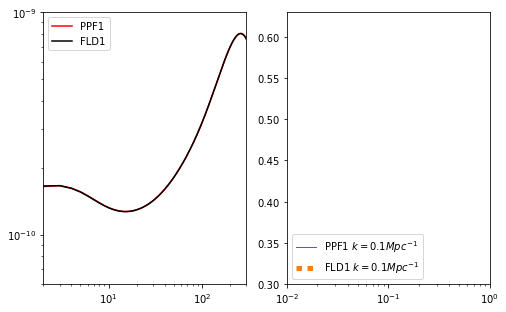

In [3]:
colours = ['r','k','g','m']

k_out = [1e-1] #[1e-4, 1e-3, 1e-2]
#models = ['PPF1','PPF2','FLD1']
models = ['PPF1','FLD1']
w0 = {'PPF1':-0.7,'PPF2':-1.15,'FLD1':-0.7,'FLD1S':-0.7}
wa = {'PPF1':0.,'PPF2':0.5,'FLD1':0.,'FLD1S':0.}
omega_cdm = {'PPF1':0.104976,'PPF2':0.120376,'FLD1':0.104976,'FLD1S':0.104976}
omega_b = 0.022
##Omega_cdm = {'PPF1':0.26,'PPF2':0.21,'FLD1':0.26,'FLD1S':0.26}
##Omega_b = 0.05
h = {'PPF1':0.64,'PPF2':0.74,'FLD1':0.64}


for Omega_K in [-0.1, 0.0, 0.15]:
    for ppfgauge in ['Synchronous','Newtonian']:
        cosmo = {}
        for M in models:
            use_ppf = 'yes'
            gauge = ppfgauge
            if 'FLD' in M:
                use_ppf = 'no'
        
            cosmo[M] = Class()
    
            cosmo[M].set({'output':'tCl Mpk dTk vTk','k_output_values':str(k_out).strip('[]'),
                  'h':h[M],
                  'omega_b':omega_b,'omega_cdm':omega_cdm[M],'Omega_k':Omega_K,
                  ##'Omega_b':Omega_b,'omega_cdm':Omega_cdm[M],
                  'cs2_fld':1.,
          'w0_fld':w0[M],'wa_fld':wa[M],'Omega_Lambda':0.,'gauge':gauge,
                 'use_ppf':use_ppf,'hyper_sampling_curved_low_nu':6.1})
            cosmo[M].compute()
            
        fig, axes = plt.subplots(1,2,figsize=(8,5))
        for j,M in enumerate(models):
            cl = cosmo[M].raw_cl()
            l = cl['ell']
            axes[0].loglog(l,cl['tt']*l*(l+1)/(2.*np.pi),label=M,color=colours[j])
        
            csm = cosmo[M]
            pt = csm.get_perturbations()
            pts = pt['scalar']
            for i,k in enumerate(k_out):
                ptk = pts[i]
                a = ptk['a']
                phi = ptk['phi']
                psi = ptk['psi']
                if 'FLD' in M:
                    ls = ':'
                    lw=5
                else:
                    ls = '-'
                    lw=1
                axes[1].semilogx(a,0.5*(phi+psi),label=M+' '+'$k='+str(k)+'Mpc^{-1}$',ls=ls,lw=lw)

        axes[0].legend(loc='upper left')
        axes[0].set_xlim([2,300])
        axes[0].set_ylim([6e-11,1e-9])

        axes[1].legend(loc='lower left')
        axes[1].set_xlim([1e-2,1])
        axes[1].set_ylim([0.3,0.63])
        
            

In [10]:
print 0.31*0.64**2-0.022
print 0.26*0.74**2-0.022

0.104976
0.120376
